# 作業
* 針對你的文章進行分群，
* 各分群是否可識別?
* 繪製文字雲圖

In [3]:
path='C:/Python/'

In [4]:
import pandas as pd
df=pd.read_csv(path+"天成飯店評論斷詞_feature.csv", index_col=None)
df.head()

,Unnamed: 0,Unnamed: 0.1,Title,Reviews,token,Rating,Place,Total_Post,Vote,Date_of_Stay,feature
0,0,0,很讚,謝謝天成大飯店的全體同仁，因為你們的努力，才有那麼好的住宿體驗！地點方便、服務人員又專業且體...,謝謝 天成 大飯店 的 全體同仁 因為 你們 的 努力 才 有 那麼 好 的 住宿 體驗 地...,50,no_place,1 篇投稿,no_helpful,2019年10月,人員 住宿 你們 值得 全體同仁 努力 因為 地點 大飯店 天成 專業 推薦 服務 謝謝 那...
1,1,1,地點方便,地點離捷運站近，要去台北景點都方便服務人員熱心，有問題也都能即時解答房間乾淨明亮，設備俱全，...,地點 離 捷運 站 近 要 去 台北 景點 都 方便 服務 人員 熱心 有 問題 也 都 能...,50,no_place,1 篇投稿,no_helpful,2019年10月,乾淨 人員 俱全 即時 台北 問題 地點 安靜 捷運 明亮 景點 服務 熱心 舒適 解答 設備
2,2,2,服務人員態度超好,離火車站、捷運很近櫃檯人員都很親切的幫忙解決問題一個人出來住到這裡真是太好了有機會一定會再來...,離 火車站 捷運 很近 櫃檯 人員 都 很 親切 的 幫忙 解決問題 一個 人 出來 住 到...,50,no_place,3 篇投稿,no_helpful,2019年10月,一個 一定 人員 再來 出來 別人 太好了 幫忙 很近 捷運 推薦 機會 櫃檯 火車站 真是...
3,3,3,推薦大家一家好飯店！,飯店到台北車站（火車、捷運、高鐵）非常便利，只要到台北出差都會選擇天成大飯店。 這是為什麼...,飯店 到 台北 車站 火車 捷運 高鐵 非常 便利 只要 到 台北 出差 都 會 選擇 天成...,50,台灣台北,10 篇投稿,no_helpful,2019年10月,一樣 一點 不然 人員 什麼 入住 兩下 出差 只要 可愛 台北 大力 她點 好吃 幫忙 愉...
4,4,4,休息一下,在臺北過夜一宿，環境舒適，服務人員相當棒，可以為您服務，住在這裏很方便，搭配捷運線想去哪都很...,在 臺北 過夜 一宿 環境 舒適 服務 人員 相當 棒 可以 為 您 服務 住 在 這裏 很...,50,台灣中正區,1 篇投稿,no_helpful,2019年10月,一宿 人員 便利 可以 夜景 捷運 搭配 晚上 服務 火車站 環境 相當 看到 線想 臺北 ...


In [5]:
n=0
print (df.Reviews[n])
print ("************************")
print (df.token[n])
print ("************************")
print (df.feature[n])

謝謝天成大飯店的全體同仁，因為你們的努力，才有那麼好的住宿體驗！地點方便、服務人員又專業且體貼，值得推薦！
************************
謝謝 天成 大飯店 的 全體同仁 因為 你們 的 努力 才 有 那麼 好 的 住宿 體驗 地點 方便 服務 人員 又 專業 且 體貼 值得 推薦
************************
人員 住宿 你們 值得 全體同仁 努力 因為 地點 大飯店 天成 專業 推薦 服務 謝謝 那麼 體貼 體驗


In [6]:
from __future__ import print_function
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import Normalizer
from sklearn import metrics
from sklearn.cluster import KMeans, MiniBatchKMeans
import pandas as pd
import numpy
import numpy as np
import matplotlib.pyplot as plt
import os
import io
import re

In [7]:
# 引數 seg_list 文件，list of documents
seg_list=[]
for d in df['feature']:
    if type(d)!=float:
        seg_list.append(d)
    else:
        seg_list.append("")

In [8]:
# Tfidf 轉換，文章字詞矩陣(dtm)    
vectorizer = TfidfVectorizer(use_idf=True, ngram_range= (1,1))
dtm = vectorizer.fit_transform(seg_list) 

# SVD 降維， #########################################
num_i =100
svd = TruncatedSVD(num_i, algorithm = 'arpack')   # object

# dtm_lsa, 每篇文章在各維度上的投影，
dtm_lsa = svd.fit_transform(dtm)  # numpy array   

# 標準化 dtm_lsa_n
dtm_lsa_n = Normalizer(copy=False).fit_transform(dtm_lsa)

# explained_variance_ratio
ratio=svd.explained_variance_ratio_    

# 字詞的編號
terms=vectorizer.vocabulary_

# 字詞的 list
term_list=vectorizer.get_feature_names()    


In [9]:
# 檢查所有的字詞
print (len(term_list))
# print (term_list)

7037


In [10]:
# 刪除 features 無值者
del_set=[]
for n in range(len(list(df.feature))):
    if type(list(df.feature)[n])!=float:
        if len(list(df.feature)[n])==0:
            del_set.append(n)      
    else:
        del_set.append(n)
print (del_set)
df.drop(axis=1, index=del_set, inplace=True)
# 重新編碼
df = df.reset_index(drop=True)
len(df)  


[]


1485

In [11]:
seg_list=list(df.feature)

In [58]:
# 指定要分的群組數目
n_clus=50  ###############################################
# dtm_lsa 作為分群的依據，呼叫 KMeans 函數
kmeans = KMeans(n_clusters=n_clus, random_state=0).fit(dtm_lsa)

# 算出各群中心點座標
cen=kmeans.cluster_centers_

# cluster 的類別
cluster=list(kmeans.labels_)
print(cluster[0:10])

[48, 28, 45, 5, 8, 17, 5, 45, 41, 27]


In [59]:
# 各群中心點座標
cen[0]

array([ 0.22139778,  0.06572752,  0.01847339, -0.13838872, -0.06205152,
       -0.06425624, -0.02573466, -0.04276501,  0.03184633, -0.00267873,
        0.02187487,  0.03505814,  0.02590767,  0.00995272, -0.090507  ,
       -0.05758345,  0.03989289, -0.03801021, -0.02276413, -0.00212452,
        0.03467388,  0.03429756,  0.01806545,  0.01319491, -0.01912472,
       -0.00253585,  0.05335836,  0.02102317, -0.03148589,  0.01604753,
        0.02911597, -0.06123412,  0.03892386,  0.04761138, -0.06892747,
       -0.08828419,  0.08561412, -0.0389641 ,  0.04903966,  0.0296987 ,
        0.0822119 , -0.05239849, -0.04925398,  0.00926167, -0.06002961,
        0.00117042,  0.00482872, -0.09675015,  0.01775238, -0.01127508,
       -0.10345307,  0.00824378, -0.04700736, -0.02385302,  0.082108  ,
       -0.04344046, -0.01638454, -0.03746588, -0.05042229, -0.03481332,
       -0.00473367, -0.0200283 ,  0.05686906, -0.07149546,  0.05998216,
        0.04674618,  0.10240816, -0.06253758,  0.07232208, -0.00

In [60]:
# 指定關鍵字 
tit=[]
clu=[]
for n in range(len(df)):
    if df.iloc[n]['feature'].find("飯店")>-1 :     ###########
        tit.append(df.iloc[n]['Title'])
        clu.append(cluster[n])
data=list(zip(tit,clu))        
df_sel=pd.DataFrame(data,columns=['title','cluster'])
print (len(df_sel))
df_sel

288


,title,cluster
0,很讚,48
1,推薦大家一家好飯店！,5
2,飯店很美,45
3,交通超方面!,34
4,2019年在台灣度過的假期,48
5,地點好,28
6,GOOOOOOD,24
7,台北最適住宿,8
8,親切的服務,45
9,位置方便的住宿地點,40


In [61]:
# 指定關鍵字 
tit=[]
clu=[]
for n in range(len(df)):
    if  df.iloc[n]['feature'].find("服務")>-1:   ################
        tit.append(df.iloc[n]['Title'])
        clu.append(cluster[n])
data=list(zip(tit,clu))        
df_sel=pd.DataFrame(data,columns=['title','cluster'])
print (len(df_sel))
df_sel

359


,title,cluster
0,很讚,48
1,地點方便,28
2,推薦大家一家好飯店！,5
3,休息一下,8
4,一流的台北洒店,5
5,地點位置非常好,45
6,台北最好的飯店,45
7,不錯選擇,4
8,非常方便的酒店,8
9,貼心服務,35


20
[('態度', 18), ('早餐', 13), ('交通', 12), ('不錯', 11), ('台北', 9), ('捷運', 8), ('車站', 8), ('員工', 7), ('整體', 7), ('位於', 6), ('分鐘', 6), ('可以', 6), ('服務員', 6), ('酒店', 6), ('便利', 6), ('乾淨', 5), ('選擇', 5), ('非常', 5), ('人員', 5), ('入住', 5)]


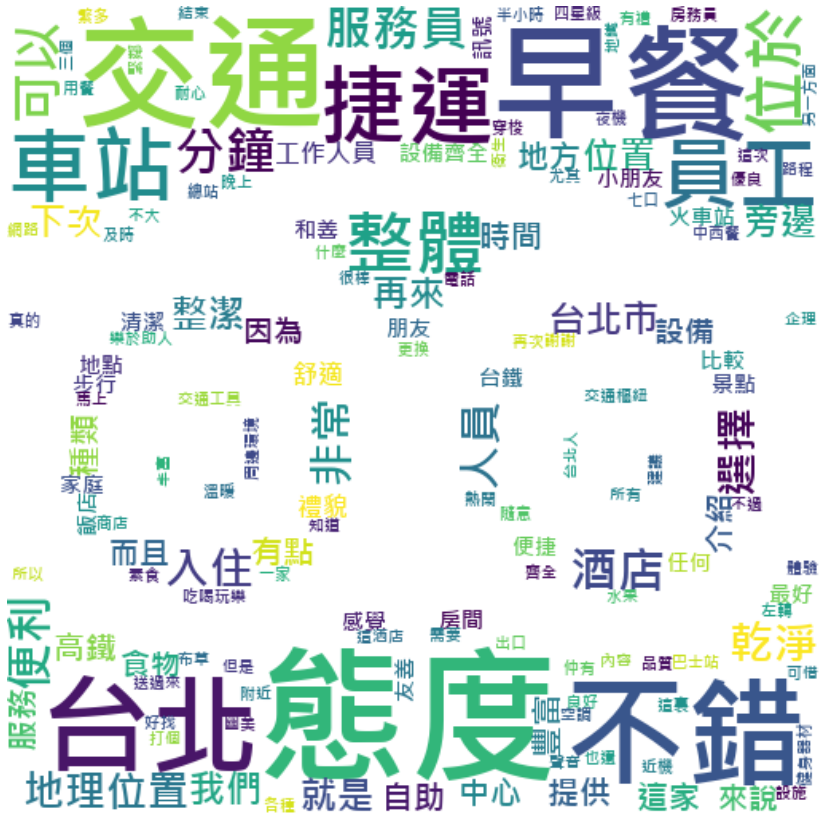

In [74]:
import matplotlib.pyplot as plt
# 各群組內的文章合併成 string
cluster_sel=20 ################## 指定群組 #####################################

# 合併成字串，引數為 string
string=''
for n in range(len(cluster)):
    if cluster[n] ==cluster_sel:
        string=string + ' ' + list(df.feature)[n]
               
# 文字雲
from PIL import Image, ImageFont, ImageDraw
from wordcloud import WordCloud, STOPWORDS   
# win10 要安裝中文字型，請拷貝 simhei.ttf 至 windows/font, 
# mask = BKImg, 如果要設定形狀
BKImg=np.array(Image.open(path+"TripAdvisor.png"))

# font_path= 選擇不同字體
# wordcloud = WordCloud(font_path='C:\Windows\Fonts\simhei.ttf',max_font_size=100, min_font_size = 5
#                      ,background_color="white", mask = BKImg, margin=3, width=3000, height=2000, max_words=1000)    

# 字體、最大字，最小字，背景色，形狀、間距、尺寸、字數
wordcloud = WordCloud(font_path='C:\Windows\Fonts\msjhbd.ttc',max_font_size=300, min_font_size = 10
                      ,background_color="white", mask = BKImg, margin=1, height=3000, max_words=2000,width=3000)

# 1 直接匯入字串繪圖 #########################
# wordcloud = wordcloud.generate(string)

# 依字詞出現的頻率，取最前面之1000個字詞繪圖
import collections
word_list=string.split()
counter=collections.Counter(word_list)
most_term=counter.most_common(1000)
wrd_dict=dict(most_term)

# 2 以字詞的頻率 dictionary 繪圖 ##############################
wordcloud = wordcloud.generate_from_frequencies(wrd_dict)    
# 印出頻率最高的字詞
print (cluster_sel)
print (counter.most_common(20))

# save #################################################
wordcloud.to_file(path + "hotel_wordcloud"+str(cluster_sel)+".jpg")

# 繪圖
plt.figure(figsize=(15,15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")      
plt.show() 

In [75]:
import collections
group=[]
for cluster_sel in range(max(cluster)+1):
    string=''
    for n in range(len(cluster)):
        if cluster[n] ==cluster_sel:
            string=string + ' ' + seg_list[n]
    word_list=string.split()
    counter=collections.Counter(word_list)
    print (cluster_sel, "****************************")
    features=''
    for k in counter.most_common(30):
        features=features+','+k[0]
    group.append(features)
    print (features[1:])

0 ****************************
便捷,迎賓,住宿,非常,旅遊,位於,水果,主動,出來,台北,服務,門口,免費,享用,咖啡廳,搭乘,滿意,贈送,捷運,餐點,豐盛,但是,剛來,小推車,效果,是贊,時候,棒棒,熱情,玻璃
1 ****************************
服務,第一次,便利,適合,我們,每個,酒店,台灣,美味,朋友,旅遊,特別,乾淨,台北,樂於助人,現代,覺得,吃飯,一樣,火車站,感受,這裏,員工,很多,舒適,設施,靠近,一級,最後,到位
2 ****************************
服务,房间,捷运,升级,免费,人员,火车站,热情,入住,这里,交通,我们,工作人员,没有,亲切,态度,他们,大床,舒适,选择,套房,帮助,旁边,饭店,因为,台湾,大饭店,酒店,高铁,天成
3 ****************************
再來,酒店,台北,可以,地方,捷運,整潔,火車站,禮貌,這間,很大,那裏,我們,飯店,下次,還會,員工,服務,一次,有善,水準,浴室,職員,價格,合理,火車,不厭其煩,人員,介紹,回憶
4 ****************************
台北,車站,服務,飯店,人員,早餐,方便,旁邊,地點,交通,天成,不錯,親切,入住,推薦,很近,乾淨,舒適,捷運,非常,下次,附近,可以,禮貌,位置,很棒,朋友,十分,豐富,整潔
5 ****************************
感覺,飯店,服務,人員,台北,天成,入住,舒適,賓至如歸,我們,這次,雖然,親切,乾淨,一樣,下次,交通,不錯,整潔,很棒,貼心,真的,比較,態度,捷運,這裡,問題,客人,回到,溫馨
6 ****************************
酒店,一個,浴室,浴缸,時候,淋浴,臺北,樂於助人,價格,最後,這家,問題,巴士,需要,其他,合理,旁邊,任何,臺灣,預訂,分鐘,是因爲,肯定,還會,知道,地方,行李,不錯,可以,保持
7 ****************************
我們,時候,因爲,晚上,一些,登記,甚至,酒店,免費,肯定,得到,臺北,回來,需要,食物,一個,入住,朋友,再次,設施,升級,看到,之前,使用,東西,非常,所有,有限,原本,單人房
8 ***********

In [76]:
cluster=pd.DataFrame(group,columns=['cluster'])
cluster.head()

,cluster
0,",便捷,迎賓,住宿,非常,旅遊,位於,水果,主動,出來,台北,服務,門口,免費,享用,咖啡廳..."
1,",服務,第一次,便利,適合,我們,每個,酒店,台灣,美味,朋友,旅遊,特別,乾淨,台北,樂於..."
2,",服务,房间,捷运,升级,免费,人员,火车站,热情,入住,这里,交通,我们,工作人员,没有,..."
3,",再來,酒店,台北,可以,地方,捷運,整潔,火車站,禮貌,這間,很大,那裏,我們,飯店,下次..."
4,",台北,車站,服務,飯店,人員,早餐,方便,旁邊,地點,交通,天成,不錯,親切,入住,推薦,..."


In [77]:
cluster.to_excel( path +"天成飯店評論分群.xlsx") 
#####################################################################
result=pd.read_excel(path+"天成飯店評論分群.xlsx", index_col=None)


In [78]:
result

,Unnamed: 0,cluster
0,0,",便捷,迎賓,住宿,非常,旅遊,位於,水果,主動,出來,台北,服務,門口,免費,享用,咖啡廳..."
1,1,",服務,第一次,便利,適合,我們,每個,酒店,台灣,美味,朋友,旅遊,特別,乾淨,台北,樂於..."
2,2,",服务,房间,捷运,升级,免费,人员,火车站,热情,入住,这里,交通,我们,工作人员,没有,..."
3,3,",再來,酒店,台北,可以,地方,捷運,整潔,火車站,禮貌,這間,很大,那裏,我們,飯店,下次..."
4,4,",台北,車站,服務,飯店,人員,早餐,方便,旁邊,地點,交通,天成,不錯,親切,入住,推薦,..."
5,5,",感覺,飯店,服務,人員,台北,天成,入住,舒適,賓至如歸,我們,這次,雖然,親切,乾淨,一..."
6,6,",酒店,一個,浴室,浴缸,時候,淋浴,臺北,樂於助人,價格,最後,這家,問題,巴士,需要,其..."
7,7,",我們,時候,因爲,晚上,一些,登記,甚至,酒店,免費,肯定,得到,臺北,回來,需要,食物,..."
8,8,",交通,服務,親切,人員,方便,台北,火車站,選擇,十分,捷運,舒適,旅遊,早餐,飯店,環境..."
9,9,",臺北,分鐘,步行,酒店,旁邊,車站,工作人員,地方,可以,機場,很多,地鐵,距離,一個,友..."
